In [519]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [520]:
def show(img):
    plt.figure()
    plt.imshow(img, cmap='gray')

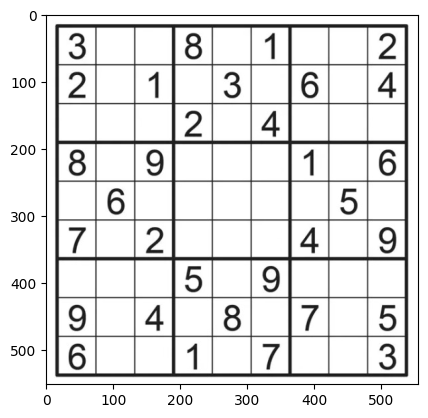

In [521]:
img = cv2.imread('Sudoku1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

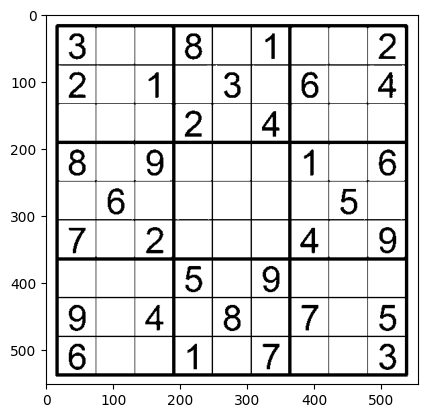

In [522]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show(thresh)

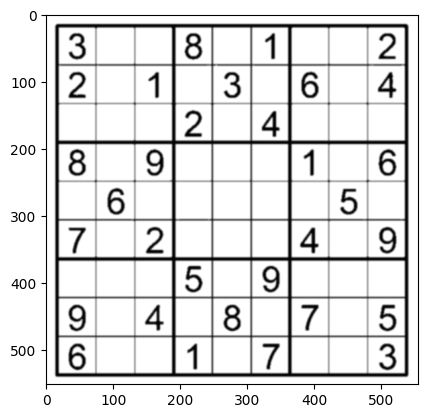

In [523]:
blurred = cv2.GaussianBlur(thresh, (5, 5), 0)
show(blurred)

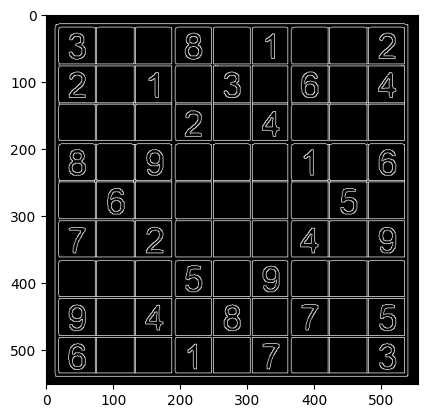

In [524]:
edges = cv2.Canny(blurred, 100, 100)
show(edges)

In [525]:
# cv2.dilate(edges, None)
# show(edges)

In [526]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [527]:
# print(contours)

In [528]:
img.shape

(552, 556, 3)

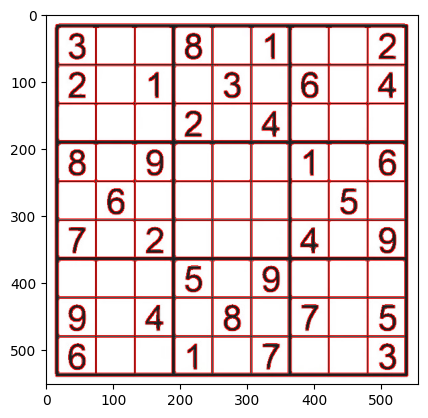

In [529]:
img_copy = np.copy(img)
cv2.drawContours(img_copy, contours, -1, (255, 1, 0), 1)
show(img_copy)

In [530]:
white = np.ones((552, 556), np.uint8) * 255

81


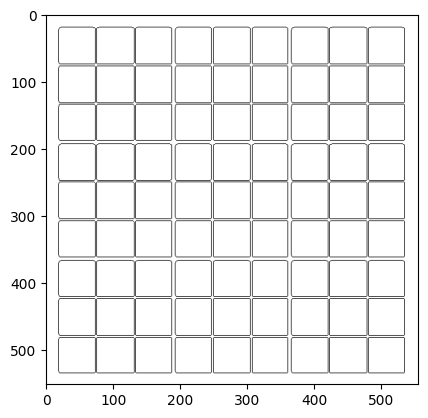

In [531]:
contours = [cnt for i, cnt in enumerate(contours) if cv2.contourArea(cnt) > 2000 and cv2.contourArea(cnt) < 3500 and hierarchy[0][i][3] > 1]
cv2.drawContours(white, contours, -1, (0, 0, 0,), 1)
show(white)
for cnt in contours:
    white = np.ones((552, 556, 3), np.uint8) * 255
    cv2.drawContours(white, [cnt], -1, (0, 0, 0), 1)
    # show(white)
print(len(contours))

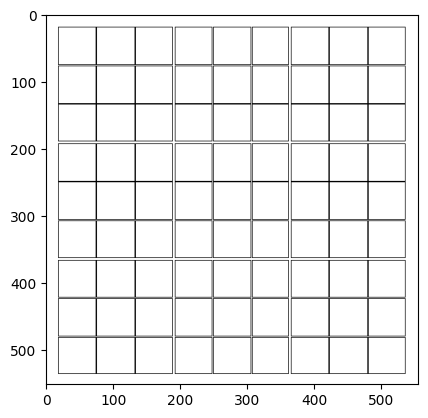

In [532]:
white = np.ones((552, 556), np.uint8) * 255
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(white,(x,y),(x+w,y+h),(),1)
show(white)

C:\Users\artha\AppData\Local\Temp\ipykernel_21272\1243565884.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


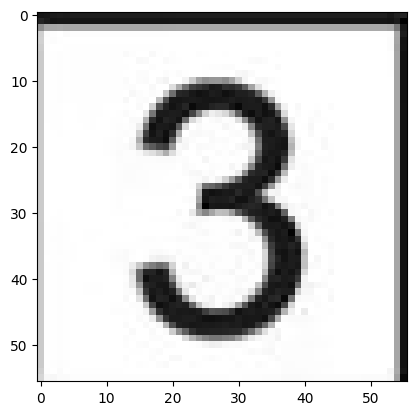

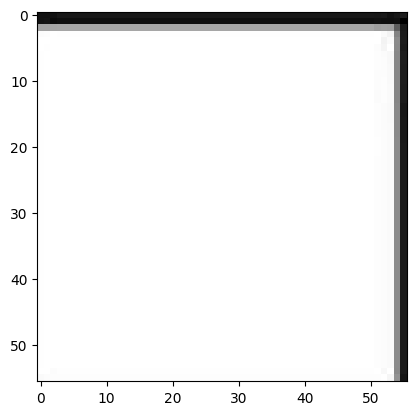

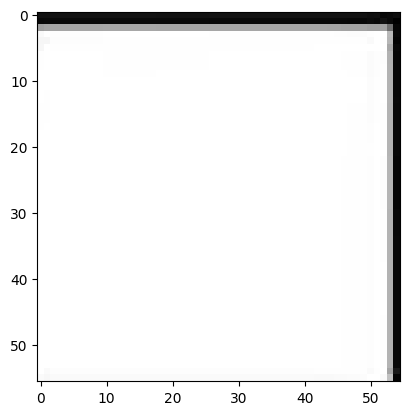

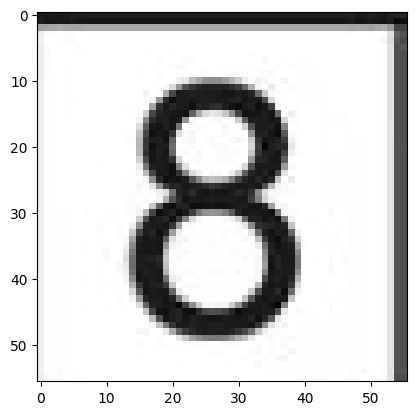

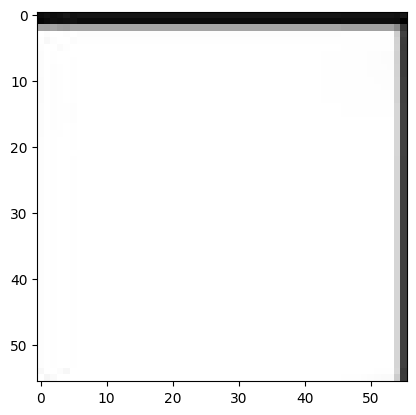

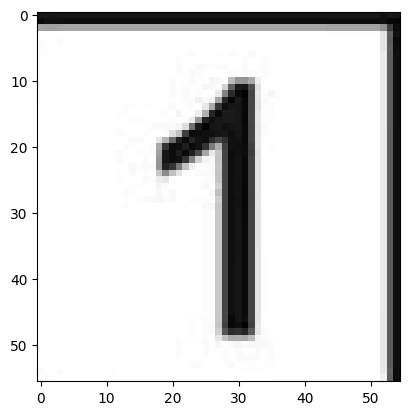

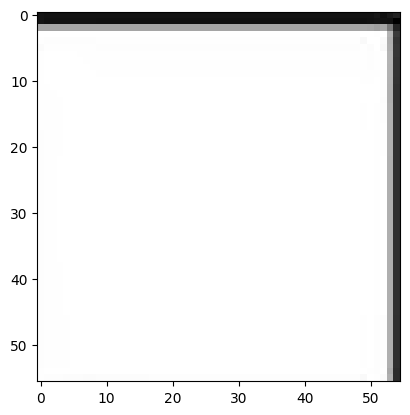

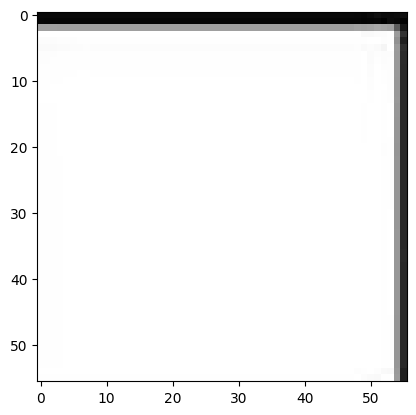

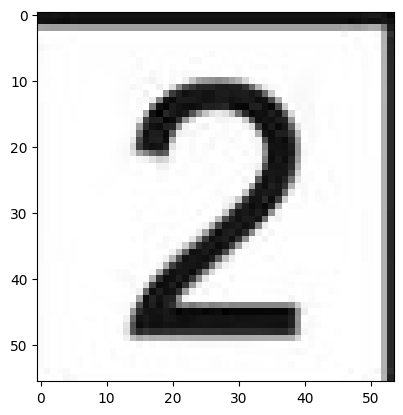

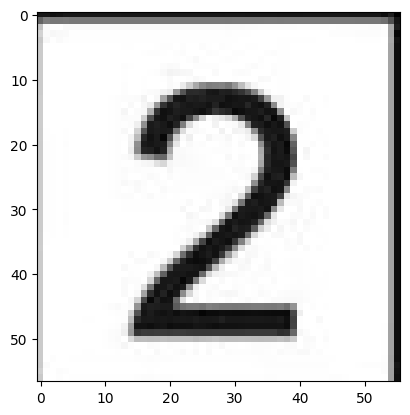

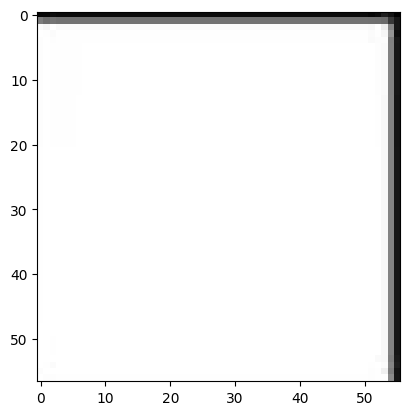

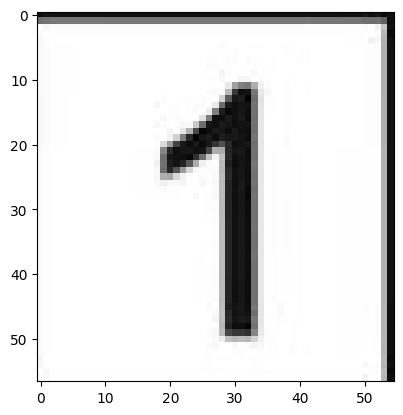

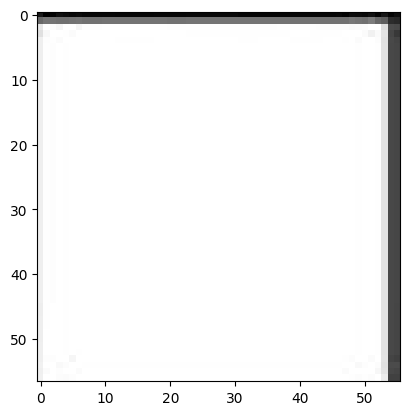

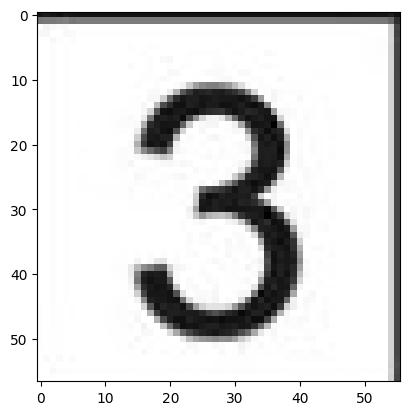

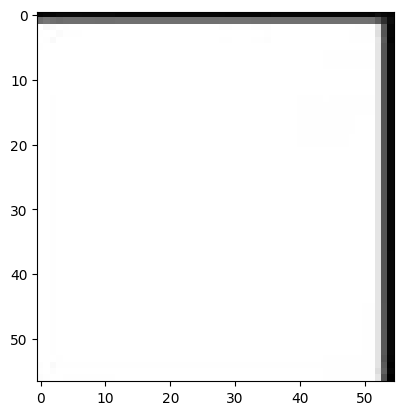

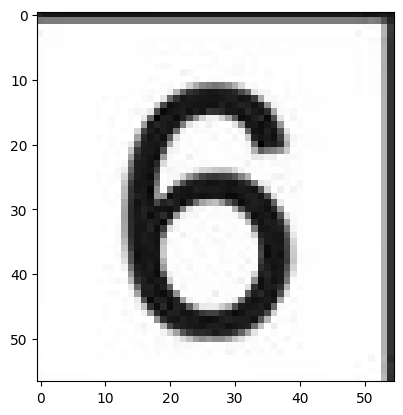

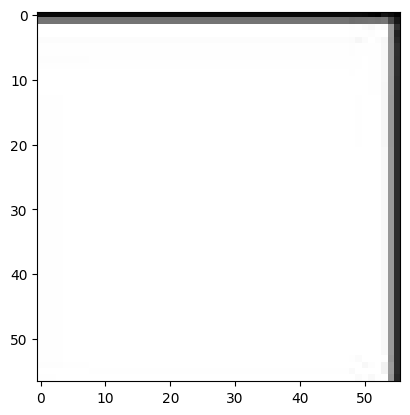

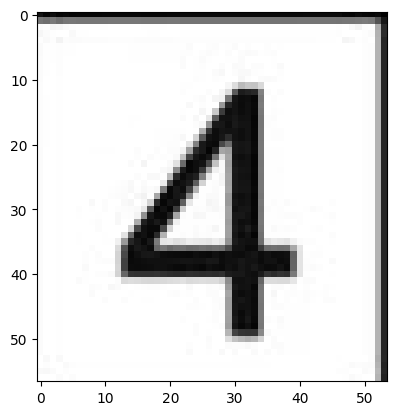

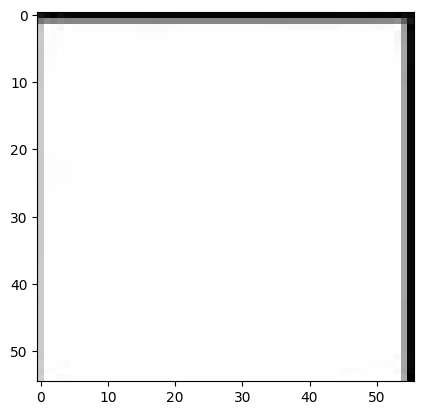

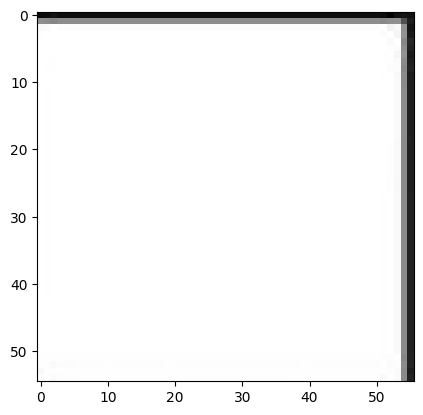

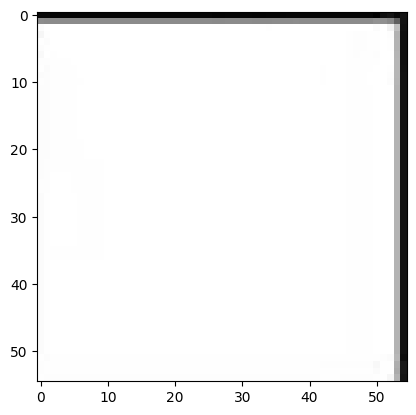

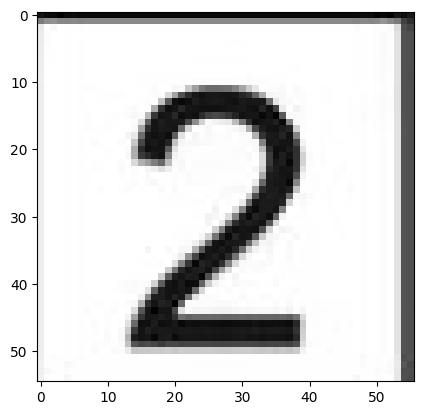

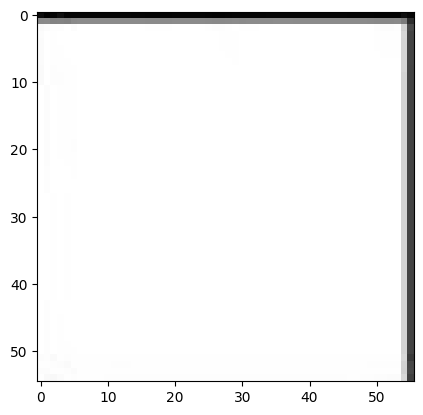

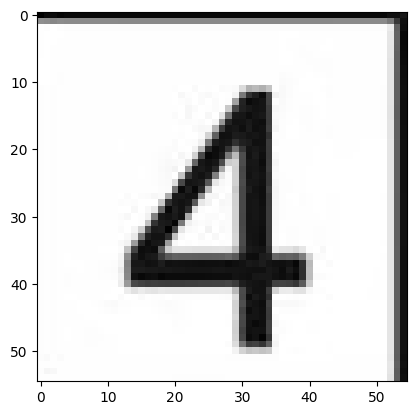

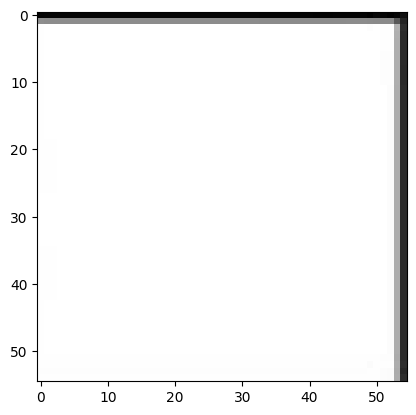

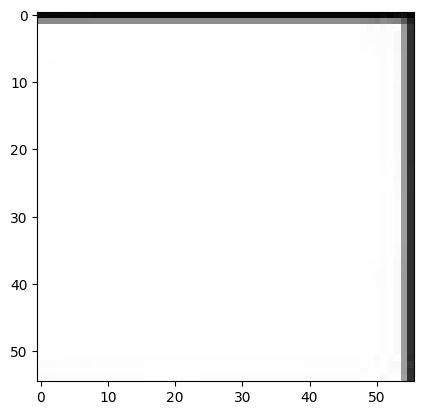

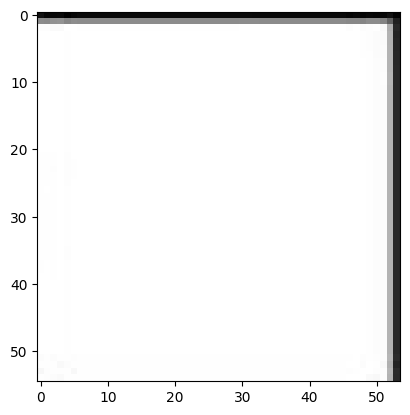

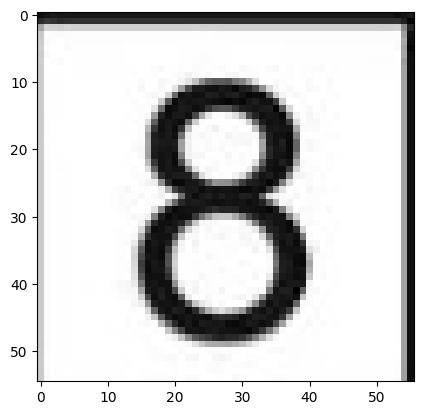

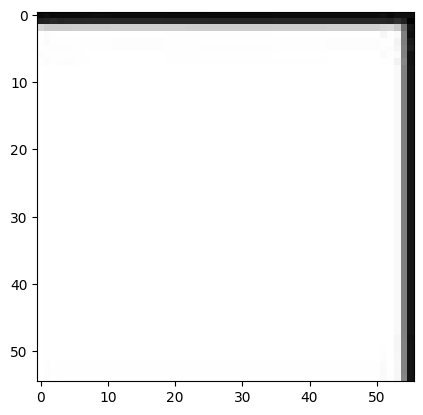

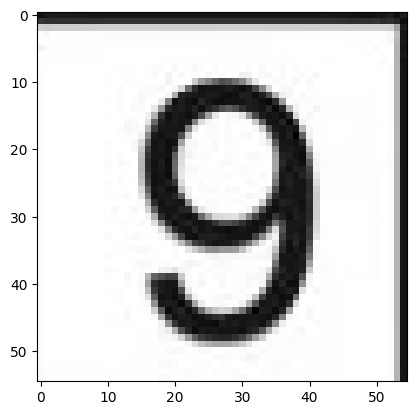

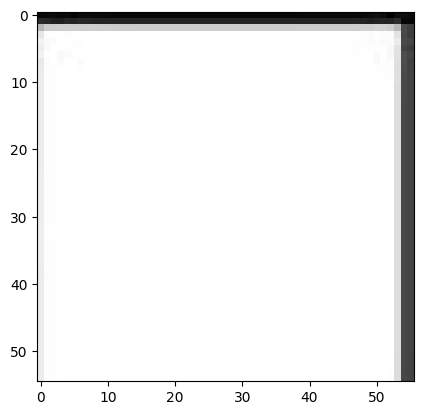

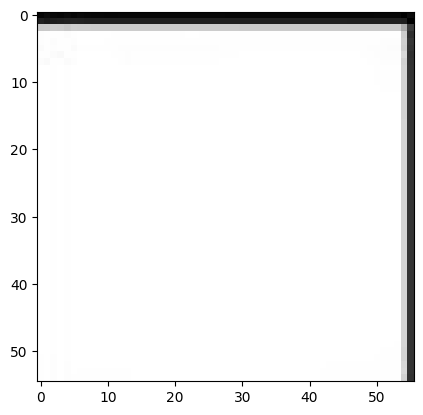

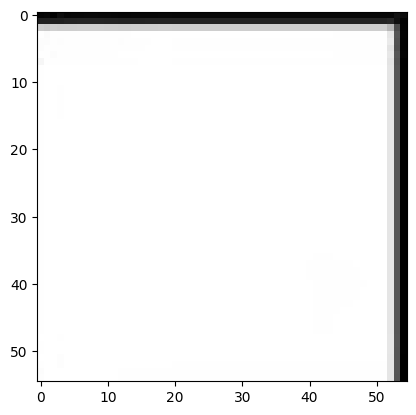

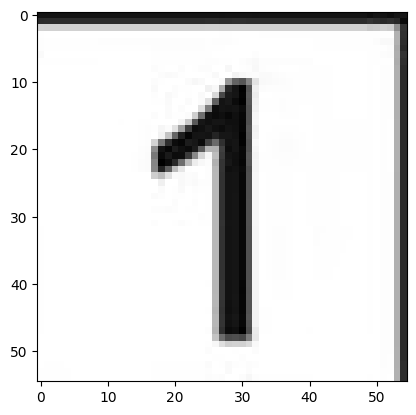

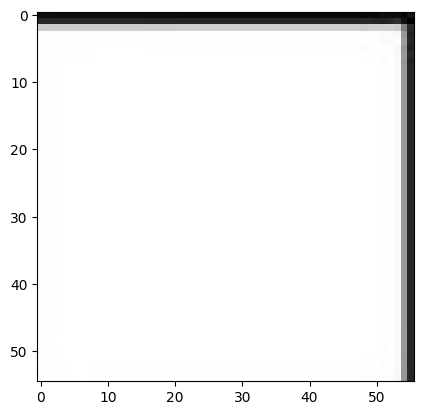

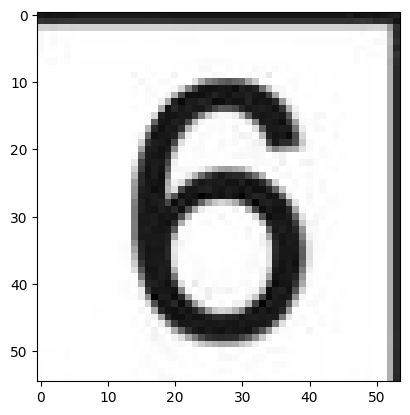

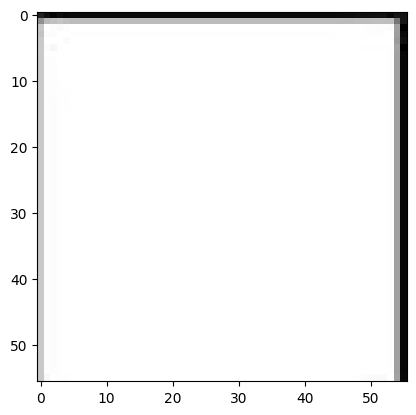

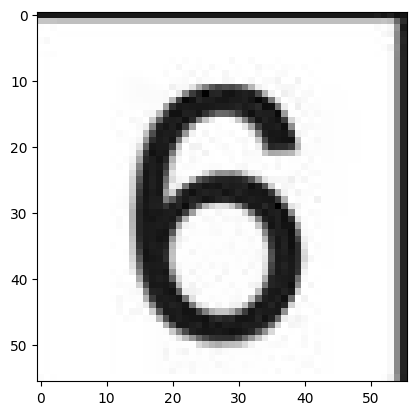

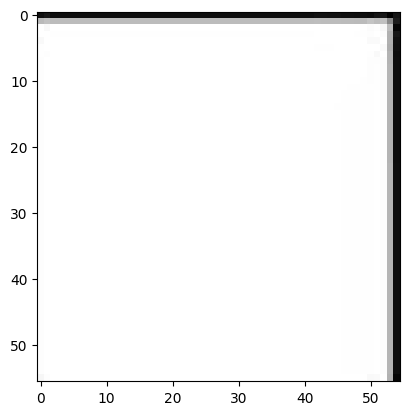

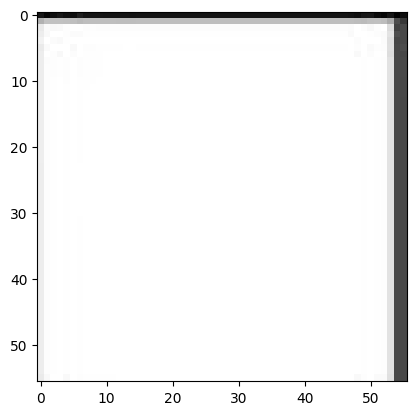

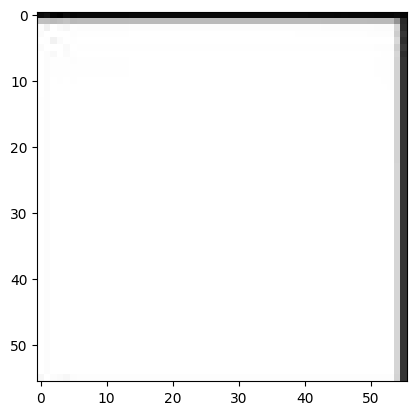

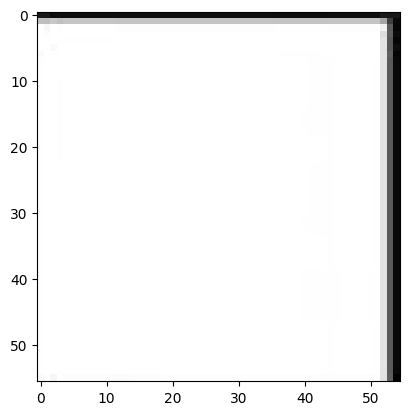

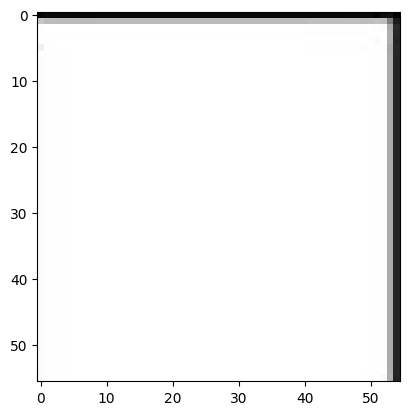

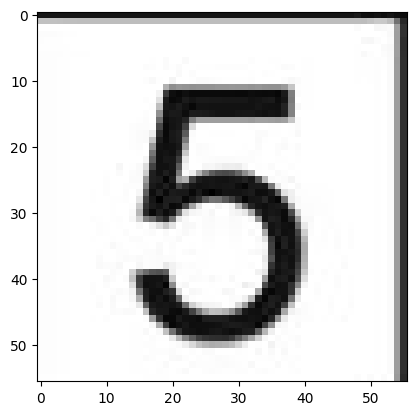

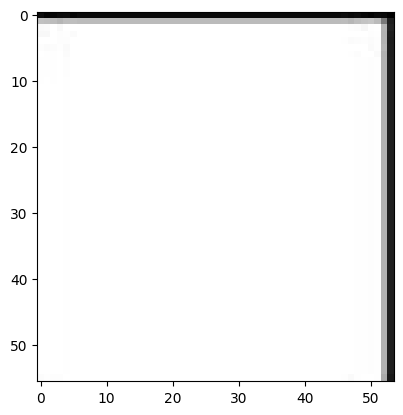

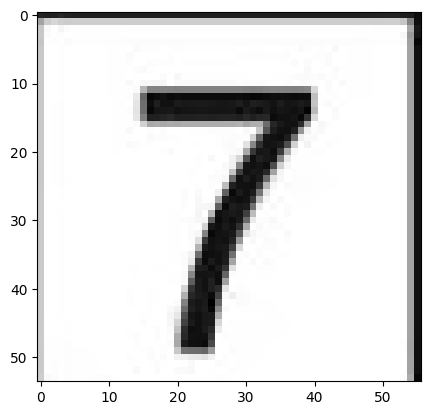

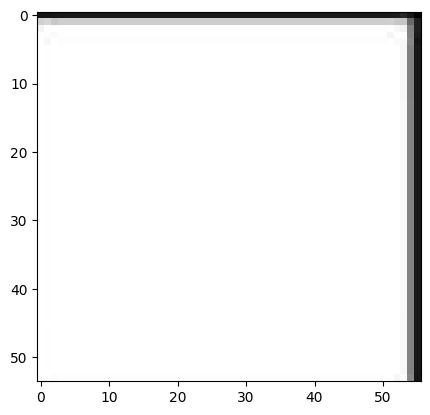

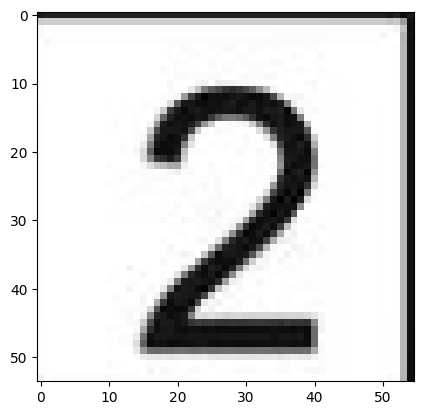

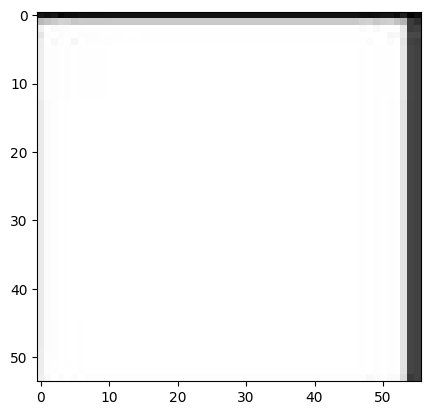

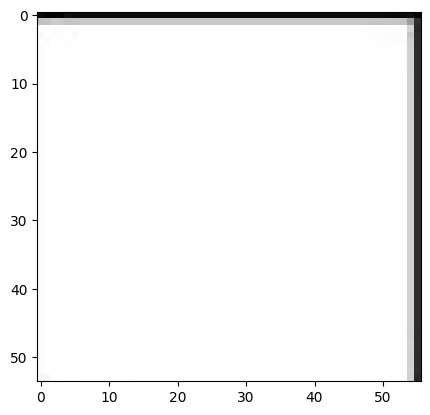

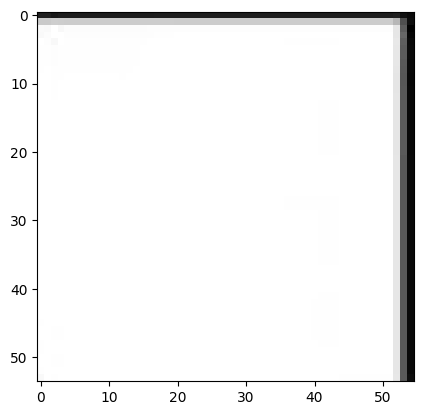

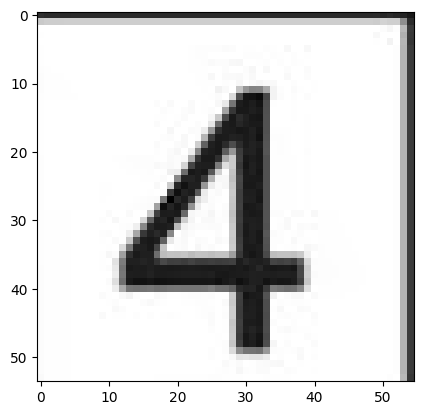

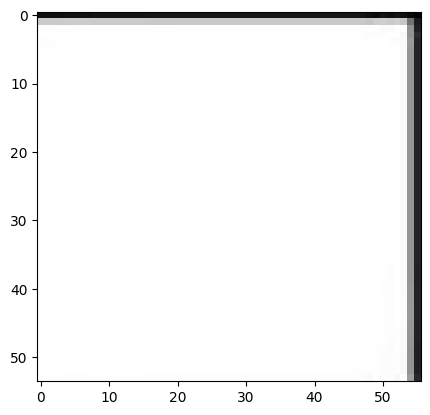

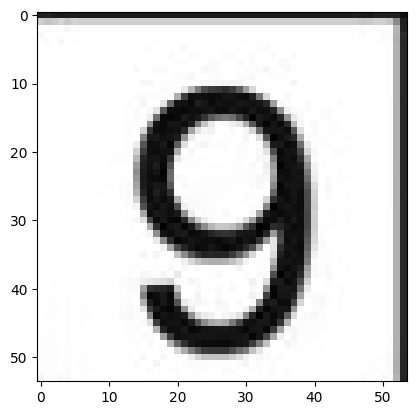

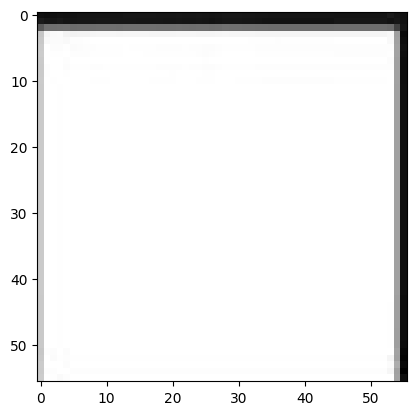

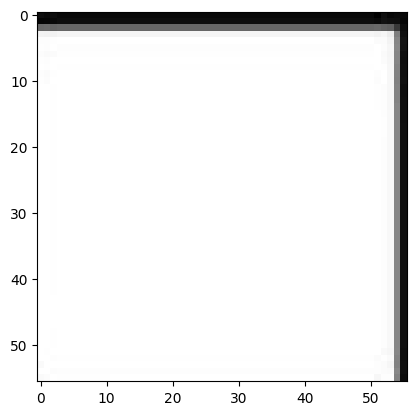

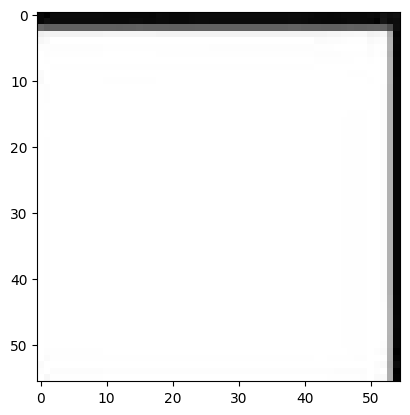

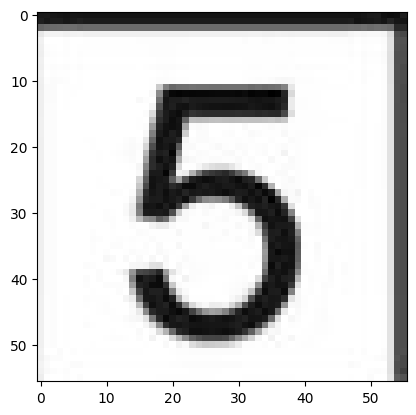

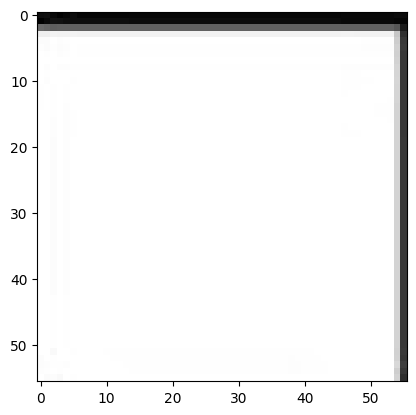

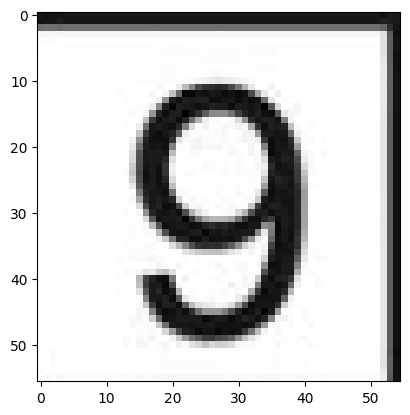

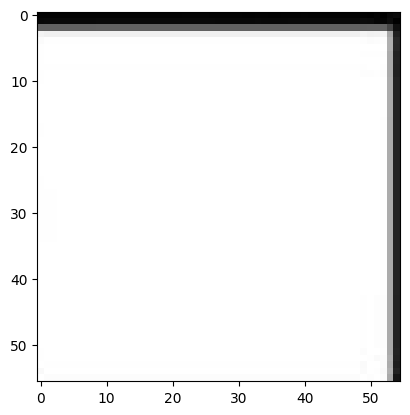

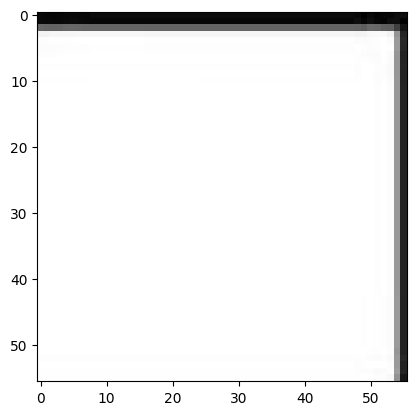

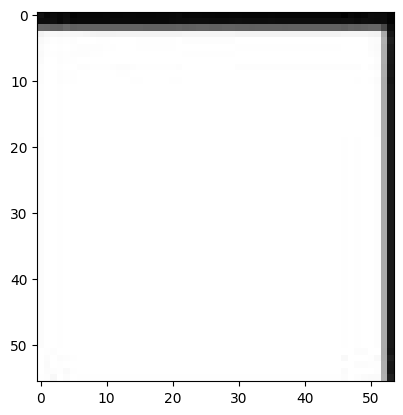

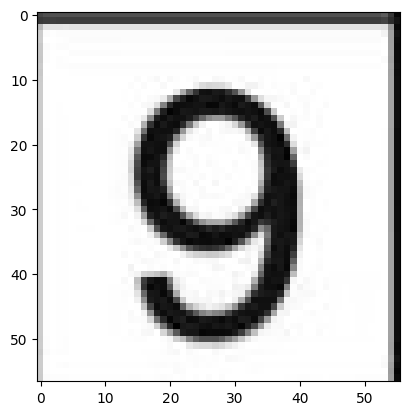

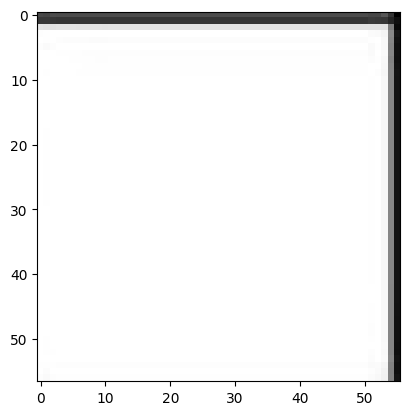

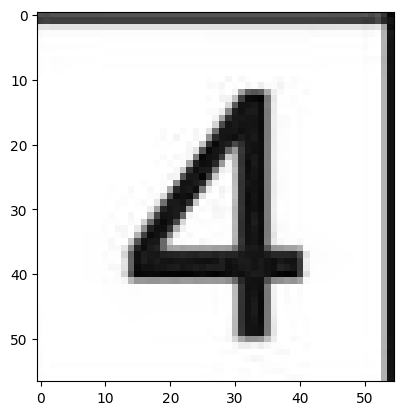

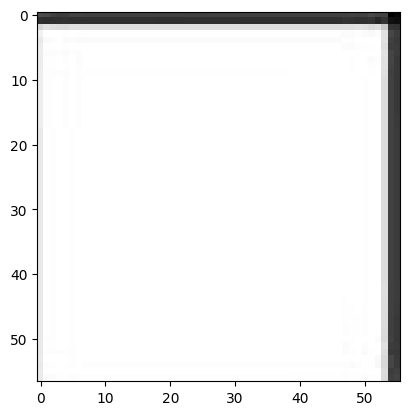

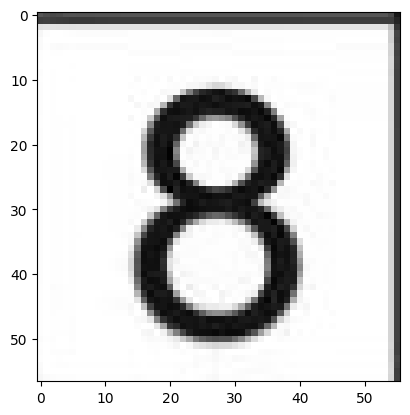

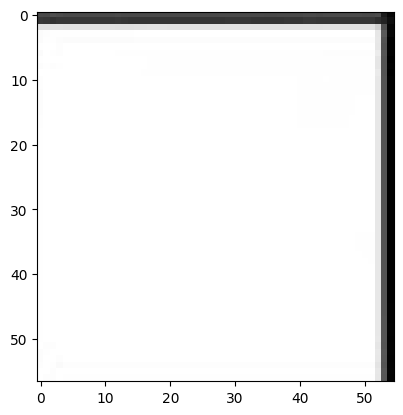

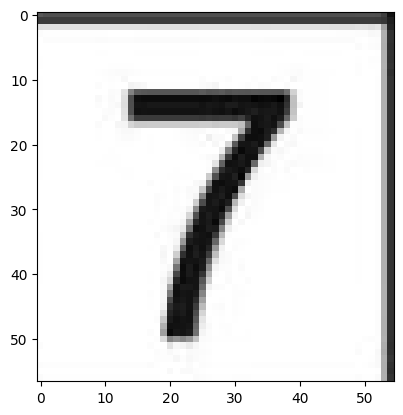

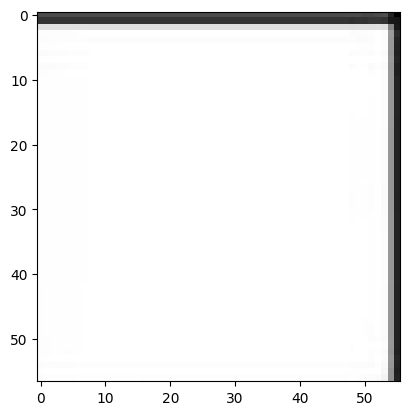

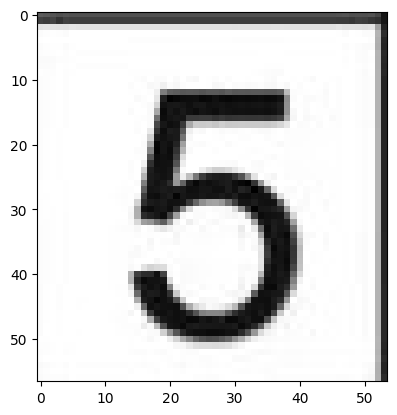

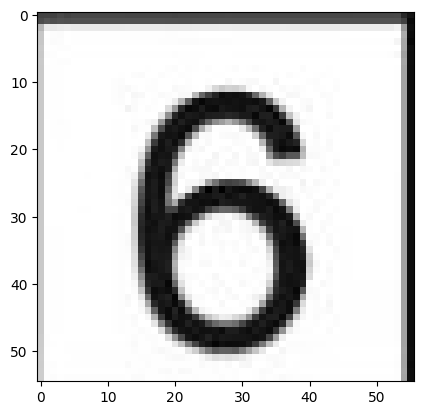

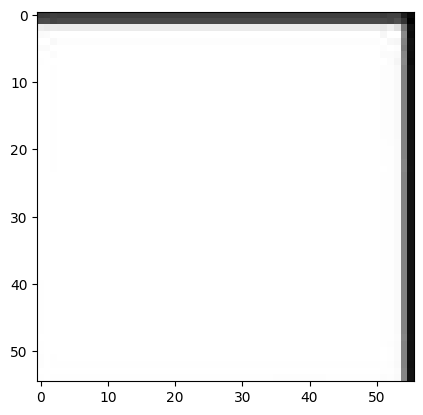

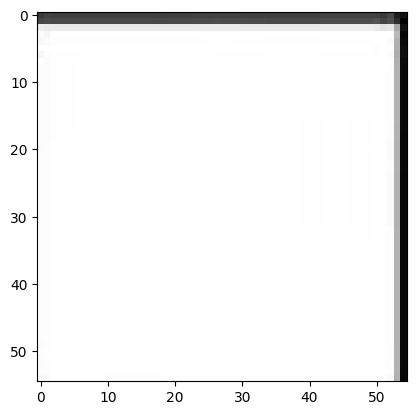

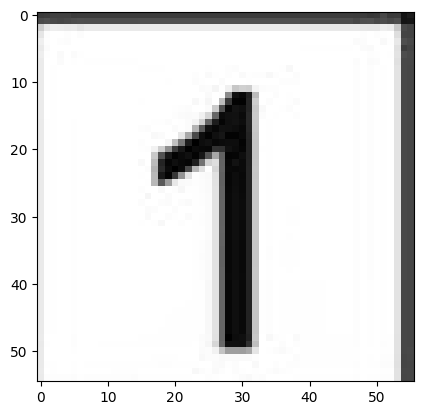

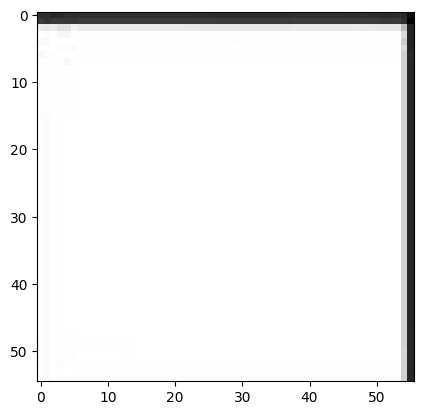

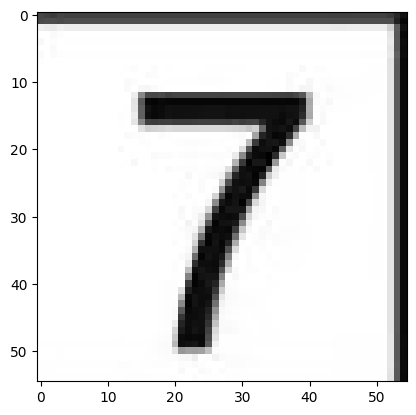

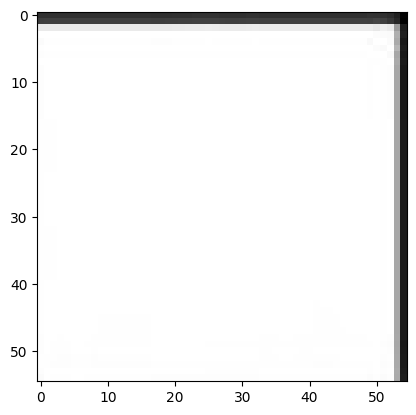

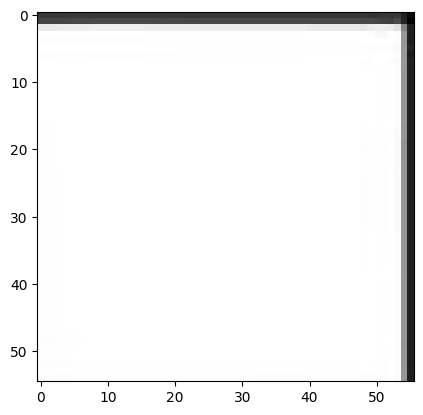

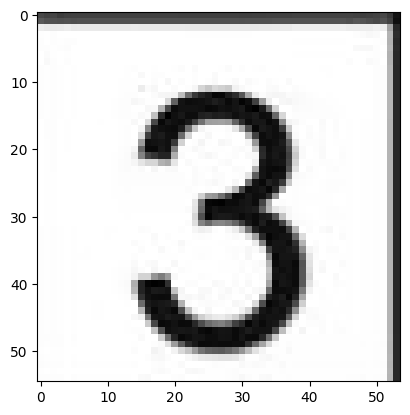

In [533]:
ROIs = [cv2.boundingRect(cnt) for cnt in contours]
ROIs = sorted(ROIs, key= lambda roi: list(roi[:2]))
numbers = []
for roi in ROIs:
    # white = np.ones((552, 556), np.uint8) * 255
    # x,y,w,h = roi
    # cv2.rectangle(white,(x,y),(x+w,y+h),(),1)
    # show(white)
    x, y, w, h = roi
    num = gray[x:x+w,y:y+h]
    numbers.append(num)

# for roi in ROIs:
#     x, y, w, h = roi
#     num = gray[x:x+w,y:y+h]
#     numbers.append(num)

for num in numbers:
    show(num)